# Predicción del precio de autos con Regresión Lineal

## 1. Importar librerías

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_abssolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

## 2. Cargar datos

In [2]:
# Cargar datos
df = pd.read_csv("../data/cars-info.csv")
df = df.drop(columns=["Unnamed: 0"])  # Eliminamos columna innecesaria

## 3. Limpieza y preparación

In [3]:
# Limpieza y preparación
df = df.dropna()  # Eliminamos filas con valores faltantes

# Renombramos columnas para evitar problemas
df = df.rename(columns={
    "max_power (in bph)": "max_power",
    "Engine (CC)": "engine",
    "Mileage Unit": "mileage_unit"
})

## 4. Selección de variables

In [4]:
# Selección de variables
features = ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
            'owner', 'seats', 'max_power', 'Mileage', 'engine']
target = 'selling_price'

X = df[features]
y = df[target]

# Columnas categóricas y numéricas
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
numerical_cols = ['year', 'km_driven', 'seats', 'max_power', 'Mileage', 'engine']

## 5. Preprocesamiento de datos

In [5]:
# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Las columnas numéricas pasan sin modificar
)

## 6. Crear el modelo

In [6]:
# Crear el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## 7. Dividir en entrenamiento y prueba

In [7]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 8. Entrenar el modelo

In [8]:
# Entrenar el modelo
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 9. Hacer predicciones

In [9]:
# Hacer predicciones
y_pred = model.predict(X_test)

## 10. Evaluación del modelo

In [10]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error absoluto medio (MAE):", mae)
print("R² Score:", r2)

Error absoluto medio (MAE): 75816.13445939764
R² Score: 0.7924681633730152


## 11. Visualización

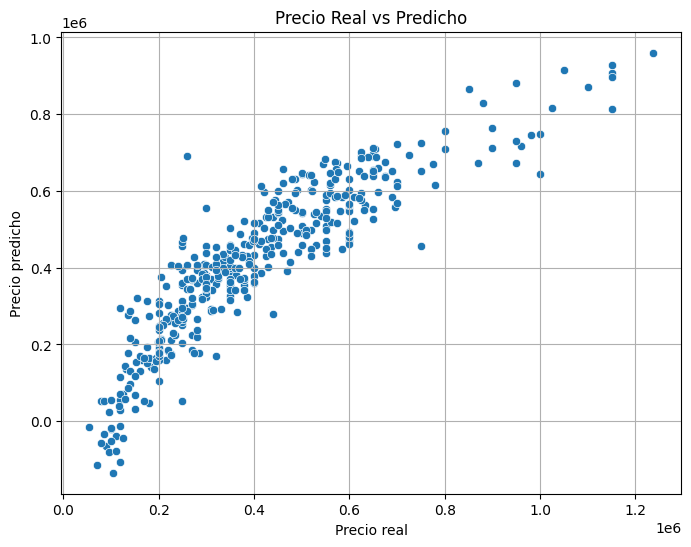

In [11]:
# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio Real vs Predicho")
plt.grid(True)
plt.show()

## 12. Predicción con un dato de prueba

In [12]:
# Predicción con un dato de prueba
nuevo_auto = pd.DataFrame([{
    'name': 'Hyundai',
    'year': 2020,
    'km_driven': 15000,
    'fuel': 'Petrol',
    'seller_type': 'Individual',
    'transmission': 'Manual',
    'owner': 'First Owner',
    'seats': 5,
    'max_power': 81.86,
    'Mileage': 20.14,
    'engine': 1197
}])

prediccion = model.predict(nuevo_auto)
print("Predicción de precio para el nuevo auto:", prediccion[0])

Predicción de precio para el nuevo auto: 645372.9553634673


## 13. Exportar el modelo entrenado

In [13]:
# Exportar el modelo entrenado
joblib.dump(model, "modelo_regresion_lineal_autos.joblib")
print("Modelo exportado como modelo_regresion_lineal_autos.joblib")

Modelo exportado como modelo_regresion_lineal_autos.joblib
